In [398]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from optbinning import OptimalBinning

# Traitement des données

## Import des données

In [399]:
df = pd.read_csv('../data/base_modelis_pass_det.csv',sep = ';')

In [400]:
liste_var = ['AMI', 'regroup_natur_op' , 'fl_fonc', 'fl_prt_Conso', 'nb_empr_ope' , 'niv_gravite_mtf_dfs', 'CD_MTF_DFC', 'sol_echec', 'fam_PCD', 'solution', 'dat_dec_echec', 'NB_RP_HOP', 'CD_DNE_CHR_LGD_SAIN', 'CD_SITFAM_EMP1', 'CD_CSP_EMP1', 'CD_ETAT_CIVIL', 'CD_NATUR_OP_PFI', 'MT_CHA_CSM_REV', 'MT_CHA_IMP', 'MT_CHA_PIP', 'MT_CHA_PIV', 'mt_rev_dispo', 'MT_CHG_MSL', 'MT_REST_VIVRE', 'ANC_BANC_MAX_PFI', 'TX_ENDET', 'CD_MTF_ENE_CTX', 'MT_PATRIM_NET', 'ANC_PRO_MAX_PFI', 'MT_CHA_HORS_OPE_PFI', 'NB_CHARGE_HORS_OPE_PFI', 'max_age_ctx', 'EAD_1an_avant_def', 'MT_REV_PFI', 'TX_APPOR', 'cum_frs_externes', 'MT_PATRIM_MOB', 'AGE_EMP1', 'dls_ges_def', 'NB_DUR_PFI', 'mt_dec_cum_IMP_tot', 'MT_FMG', 'MT_EAD_RESID', 'cum_dec', 'nb_bienHOP', 'dls_mep_entree_def', 'CD_POST_BIEN_PFI', 'cum_rec', 'MT_EAD_DNE_CHR_d', 'MR_arr', 'NB_LO_HOP','fl_pass_DET', 'arrete', 'cd_op','date_entree_defaut', 'NB_DUR_PFI','fl_prise_de_gar','PTG','CD_NATUR_OP_PFI',
'regroup_natur_op','DT_MEP_OPE','nb_prt','FL_REL_NON_ANNULE']

In [401]:
liste_var = list(set(liste_var))

In [402]:
df = df[liste_var]

## Traitement des types de variables
##### Passage des variables numériques ayant moins de 10 valeurs uniques en catégorie

In [403]:
filtre = (df.select_dtypes(include = 'number').nunique()<10)

for col in df.select_dtypes(include = 'number').loc[:,filtre].columns:
    df[col] = df[col].astype('object')

In [404]:
df['fl_pass_DET'] = df['fl_pass_DET'].astype('int')

##### Traitement des variables de types Datetime

In [405]:
df['arrete'] = pd.to_datetime(df['arrete'])
df['date_entree_defaut'] = pd.to_datetime(df['date_entree_defaut'])

/var/folders/12/33kq22951gn7jfpz3d32v_qc0000gn/T/ipykernel_5165/2107458667.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['arrete'] = pd.to_datetime(df['arrete'])
/var/folders/12/33kq22951gn7jfpz3d32v_qc0000gn/T/ipykernel_5165/2107458667.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date_entree_defaut'] = pd.to_datetime(df['date_entree_defaut'])


In [406]:
df['DT_MEP_OPE'] = pd.to_datetime(df['DT_MEP_OPE'], format='%d%b%Y:%H:%M:%S.%f')

In [407]:
df['DT_MEP_OPE'] = df['arrete'] - df['DT_MEP_OPE'] # Pour récupérer l'information de la recence du prêt
df['DT_MEP_OPE'] = df['DT_MEP_OPE'].dt.days

##### Création d'une variable DET indiquant dans la première ligne le passage en DET

In [408]:
liste_det = df[df['fl_pass_DET'] == 1]['cd_op']
df['DET'] = np.where(df['cd_op'].isin(liste_det), 1, 0)

## Traitement des anomalies
##### Suppression des individus n’ayant qu’une ligne

In [409]:
anomalie = (df['cd_op'].value_counts() ==1)
anomalie = pd.DataFrame(anomalie)
liste_anomalie = anomalie[anomalie['count']==True].index

In [410]:
df['anomalie'] = np.where(df['cd_op'].isin(liste_anomalie), 1, 0)

In [411]:
df = df[df['anomalie'] == 0]

In [412]:
df.drop(columns = ['fl_pass_DET','anomalie'], inplace = True)

##### Récupération de la première ligne de chaque individu

In [413]:
df_ph = df.drop_duplicates(subset = 'cd_op' , keep = 'last')
df = df.drop_duplicates(subset = 'cd_op' , keep = 'first')

In [414]:
df_ph['date_entree_defaut'] = np.where((df_ph['arrete'] - df_ph['date_entree_defaut']).dt.days < 0,
                                       df_ph['date_entree_defaut'] - pd.DateOffset(years=1),
                                       df_ph['date_entree_defaut'])

## Traitement des valeurs manquantes

In [415]:
df.isna().sum()

MT_CHA_PIV                 6422
arrete                        0
CD_SITFAM_EMP1                0
mt_rev_dispo               3562
cd_op                         0
date_entree_defaut            0
niv_gravite_mtf_dfs         801
CD_CSP_EMP1                   0
CD_POST_BIEN_PFI              0
cum_rec                       0
dls_mep_entree_def            0
ANC_PRO_MAX_PFI             241
mt_dec_cum_IMP_tot            0
AMI                        4580
AGE_EMP1                      0
TX_APPOR                      1
max_age_ctx                   4
MT_PATRIM_MOB                 0
fl_prt_Conso                  0
dat_dec_echec                 0
fl_fonc                       0
CD_MTF_ENE_CTX              801
FL_REL_NON_ANNULE             0
nb_empr_ope                   0
MT_EAD_DNE_CHR_d              0
MT_FMG                        0
NB_LO_HOP                 11363
MT_CHA_PIP                 6422
NB_DUR_PFI                    0
CD_ETAT_CIVIL                 0
NB_RP_HOP                 11363
DT_MEP_O

##### Imputation par la moyenne / le mode 

In [416]:
for col in df.select_dtypes(include = 'number').columns:
    valeur = df[col].median()
    df[col].fillna(valeur, inplace=True)
    
    
for col in df.select_dtypes(include = 'object').columns:
    valeur = df[col].mode()
    df[col].fillna(valeur.iloc[0], inplace=True)

In [417]:
for col in df_ph.select_dtypes(include = 'number').columns:
    valeur = df_ph[col].median()
    df_ph[col].fillna(valeur, inplace=True)
    
    
for col in df_ph.select_dtypes(include = 'object').columns:
    valeur = df_ph[col].mode()
    df_ph[col].fillna(valeur.iloc[0], inplace=True)

In [418]:
assert df.isna().sum().sum()==0

## Regroupement de modalités 
### Motif

In [419]:
motif_tres_mauvais = ['ESC' , 'REL', 'ORG', 'PPE', 'DEC', 'SIN']
motif_mauvais = ['MOR', 'CHO', 'DIV', 'SUR', 'RIS', 'SEP', 'SAN', 'CON', 'DI1' ]  
motif_moyen = ['BDF', 'AUT', 'PCL', 'PCT', 'YYY']

df['CD_MTF_DFC'] = np.select(
    [
        df['CD_MTF_DFC'].isin(motif_tres_mauvais),
        df['CD_MTF_DFC'].isin(motif_mauvais),
        df['CD_MTF_DFC'].isin(motif_moyen)
    ],
    ['Motif tres mauvais', 'Motif mauvais', 'Motif moyen'],
    default='Motif moyen')

In [420]:
df_ph['Motif'] = np.select(
    [
        df_ph['CD_MTF_DFC'].isin(motif_tres_mauvais),
        df_ph['CD_MTF_DFC'].isin(motif_mauvais),
        df_ph['CD_MTF_DFC'].isin(motif_moyen)
    ],
    ['Motif tres mauvais', 'Motif mauvais', 'Motif moyen'],
    default='Motif moyen')
df_ph.drop(columns ='CD_MTF_DFC', inplace = True)

### Nb emprunteurs

In [421]:
precaire = [1]
# Ajouter une colonne 'Groupe' au DataFrame en fonction des catégories
df['nb_empr_ope'] = np.where(df['nb_empr_ope'].isin(precaire), 'Un emprunteur', 'Plus d\'un emprunteur')
df_ph['nb_empr_ope'] = np.where(df_ph['nb_empr_ope'].isin(precaire), 'Un emprunteur', 'Plus d\'un emprunteur')

### Gravite

In [422]:
precaire = [2.0,3.0]
df['niv_gravite_mtf_dfs'] = np.where(df['niv_gravite_mtf_dfs'].isin(precaire), 'Grave', 'Pas grave')
df_ph['niv_gravite_mtf_dfs'] = np.where(df_ph['niv_gravite_mtf_dfs'].isin(precaire), 'Grave', 'Pas grave')

### CD_SITFAM_EMP1

In [423]:
precaire = ['I','D','C'] 

df['Situation_fam'] = np.where(df['CD_SITFAM_EMP1'].isin(precaire), 'Mauvaise situation', 'Bonne situation')
df_ph['Situation_fam'] = np.where(df_ph['CD_SITFAM_EMP1'].isin(precaire), 'Mauvaise situation', 'Bonne situation')

df.drop(columns ='CD_SITFAM_EMP1', inplace = True)
df_ph.drop(columns ='CD_SITFAM_EMP1', inplace = True)

### CD_NATUR_OP_PFI

In [424]:
precaire = ['ACR', 'ARA', 'SCP', 'ATR', 'COR', 'AQN', 'AQA']

df['Nature'] = np.where(df['CD_NATUR_OP_PFI'].isin(precaire), 'Mauvaise nature', 'Bonne nature')
df_ph['Nature'] = np.where(df_ph['CD_NATUR_OP_PFI'].isin(precaire), 'Mauvaise nature', 'Bonne nature')

df.drop(columns ='CD_NATUR_OP_PFI', inplace = True)
df_ph.drop(columns ='CD_NATUR_OP_PFI', inplace = True)

### Sol_echec

In [425]:
precaire = ['0_1', '1_1']

df['Solution_echec'] = np.where(df['sol_echec'].isin(precaire), 'Mauvaise solution', 'Bonne solution')
df_ph['Solution_echec'] = np.where(df_ph['sol_echec'].isin(precaire), 'Mauvaise solution', 'Bonne solution')

df.drop(columns ='sol_echec', inplace = True)
df_ph.drop(columns ='sol_echec', inplace = True)

### Nature operation

In [426]:
precaire = ['4_autre']

df['Nature_op'] = np.where(df['regroup_natur_op'].isin(precaire), 'Mauvaise nature', 'Bonne nature')
df_ph['Nature_op'] = np.where(df_ph['regroup_natur_op'].isin(precaire), 'Mauvaise nature', 'Bonne nature')

df.drop(columns ='regroup_natur_op', inplace = True)
df_ph.drop(columns ='regroup_natur_op', inplace = True)

### MTF

In [427]:
precaire = [102.0]
df['CD_MTF_ENE_CTX'] = np.where(df['CD_MTF_ENE_CTX'].isin(precaire), 'Mauvais MTF', 'Bon MTF')
df_ph['MTF'] = np.where(df_ph['CD_MTF_ENE_CTX'].isin(precaire), 'Mauvais MTF', 'Bon MTF')
df_ph.drop(columns ='CD_MTF_ENE_CTX', inplace = True)

### ETAT_CIVIL

In [428]:
precaire = [4.0,5.0,2.0,8.0,3.0,7.0]
df['ETAT_CIVIL'] = np.where(df['CD_ETAT_CIVIL'].isin(precaire), 'Mauvais etat', 'Bon etat')
df_ph['ETAT_CIVIL'] = np.where(df_ph['CD_ETAT_CIVIL'].isin(precaire), 'Mauvais etat', 'Bon etat')

df.drop(columns ='CD_ETAT_CIVIL', inplace = True)
df_ph.drop(columns ='CD_ETAT_CIVIL', inplace = True)

### CSP

In [429]:
precaire = ['PEO' , 'PAM', 'FEO', 'FCA']

df['CSP'] = np.where(df['CD_CSP_EMP1'].isin(precaire), 'Mauvaise CSP', 'Bonne CSP')
df_ph['CSP'] = np.where(df_ph['CD_CSP_EMP1'].isin(precaire), 'Mauvaise CSP', 'Bonne CSP')

df_ph.drop(columns ='CD_CSP_EMP1', inplace = True)
df.drop(columns ='CD_CSP_EMP1', inplace = True)

### Code Postal

In [430]:
list_mean = []
for cat in df['CD_POST_BIEN_PFI'].unique():
    moyenne = df[df['CD_POST_BIEN_PFI']==cat]['DET'].mean()
    list_mean.append(moyenne)
    
CP = pd.DataFrame(list_mean)
CP['CD_POST_BIEN_PFI'] = df['CD_POST_BIEN_PFI'].unique()
CP.rename(columns = {0:'DET'},inplace =True)

In [431]:
CP.rename(columns = {0:'DET'},inplace =True)

In [432]:
CP_tres_mauvais = CP[CP['DET']>0.4]['CD_POST_BIEN_PFI']
CP_mauvais = CP[CP['DET']>0.3]['CD_POST_BIEN_PFI'] 
CP_moyen =CP[CP['DET']<0.3]['CD_POST_BIEN_PFI']

df['CD_POST_BIEN_PFI'] = np.select(
    [
        df['CD_POST_BIEN_PFI'].isin(CP_tres_mauvais),
        df['CD_POST_BIEN_PFI'].isin(CP_mauvais),
        df['CD_POST_BIEN_PFI'].isin(CP_moyen)
    ],
    ['CP tres mauvais', 'CP mauvais', 'CP moyen'],
    default='CP moyen')

In [433]:
list_mean = []
for cat in df_ph['CD_POST_BIEN_PFI'].unique():
    moyenne = df_ph[df_ph['CD_POST_BIEN_PFI']==cat]['DET'].mean()
    list_mean.append(moyenne)
    
CP_ph = pd.DataFrame(list_mean)
CP_ph['CP'] = df_ph['CD_POST_BIEN_PFI'].unique()

In [434]:
CP_ph.rename(columns = {0:'DET'},inplace =True)

In [435]:
CP_tres_mauvais = CP_ph[CP_ph['DET']>0.4]['CP']
CP_mauvais = CP_ph[CP_ph['DET']>0.3]['CP'] 
CP_moyen =CP_ph[CP_ph['DET']<0.3]['CP']

# Ajouter une colonne 'Catégorie' au DataFrame en fonction des catégories
df_ph['CP'] = np.select(
    [
        df_ph['CD_POST_BIEN_PFI'].isin(CP_tres_mauvais),
        df_ph['CD_POST_BIEN_PFI'].isin(CP_mauvais),
        df_ph['CD_POST_BIEN_PFI'].isin(CP_moyen)
    ],
    ['CP tres mauvais', 'CP mauvais', 'CP moyen'],
    default='CP moyen')

### Passage de l'identifiant en index

In [436]:
df.index = df['cd_op']
df.drop(columns = 'cd_op',inplace = True)

In [437]:
df_ph.index = df_ph['cd_op']
df_ph.drop(columns = 'cd_op',inplace = True)

# Var numériques

In [438]:
for col in df.select_dtypes(include = 'bool').columns : 
    df[col] = df[col].apply(lambda x: 1 if x == True else 0)

In [439]:
for col in df_ph.select_dtypes(include = 'bool').columns : 
    df_ph[col] = df_ph[col].apply(lambda x: 1 if x == True else 0)

# Discretisation des variables numériques

In [440]:
df['niv_gravite_mtf_dfs'] = df['niv_gravite_mtf_dfs'].apply(lambda x : 1 if x == 'Grave' else 0)
df['niv_gravite_mtf_dfs'] = df['niv_gravite_mtf_dfs'].astype('int')

df_ph['niv_gravite_mtf_dfs'] = df_ph['niv_gravite_mtf_dfs'].apply(lambda x : 1 if x == 'Grave' else 0)
df_ph['niv_gravite_mtf_dfs'] = df_ph['niv_gravite_mtf_dfs'].astype('int')

In [441]:
for variable in df[['MT_EAD_DNE_CHR_d', 'MT_EAD_RESID', 'niv_gravite_mtf_dfs', 'MT_REV_PFI',
       'MT_FMG', 'ANC_PRO_MAX_PFI', 'EAD_1an_avant_def', 'CD_DNE_CHR_LGD_SAIN',
       'max_age_ctx', 'TX_APPOR']]:
    
    print(variable,"\n")
    
    X = df[variable].values  
    y = df['DET'].values  

    optb = OptimalBinning(name=variable, dtype="numerical", solver="cp",min_n_bins=2 ,max_n_bins=2)
    optb.fit(X, y)

    binning_table = optb.binning_table
    print(binning_table.build())

    X_transformed = optb.transform(X, metric="bins")

    df[f'{variable}_binned']=X_transformed

MT_EAD_DNE_CHR_d 

                    Bin  Count  Count (%)  Non-event  Event  Event rate  \
0       (-inf, 9153.62)   1226   0.054025        905    321    0.261827   
1        [9153.62, inf)  21467   0.945975      14595   6872    0.320119   
2               Special      0   0.000000          0      0    0.000000   
3               Missing      0   0.000000          0      0    0.000000   
Totals                   22693   1.000000      15500   7193    0.316970   

             WoE        IV        JS  
0       0.268762  0.003698  0.000461  
1      -0.014508  0.000200  0.000025  
2            0.0  0.000000  0.000000  
3            0.0  0.000000  0.000000  
Totals            0.003898  0.000486  
MT_EAD_RESID 

                     Bin  Count  Count (%)  Non-event  Event  Event rate  \
0       (-inf, 59872.16)   7363   0.324461       5218   2145    0.291321   
1        [59872.16, inf)  15330   0.675539      10282   5048    0.329289   
2                Special      0   0.000000          0

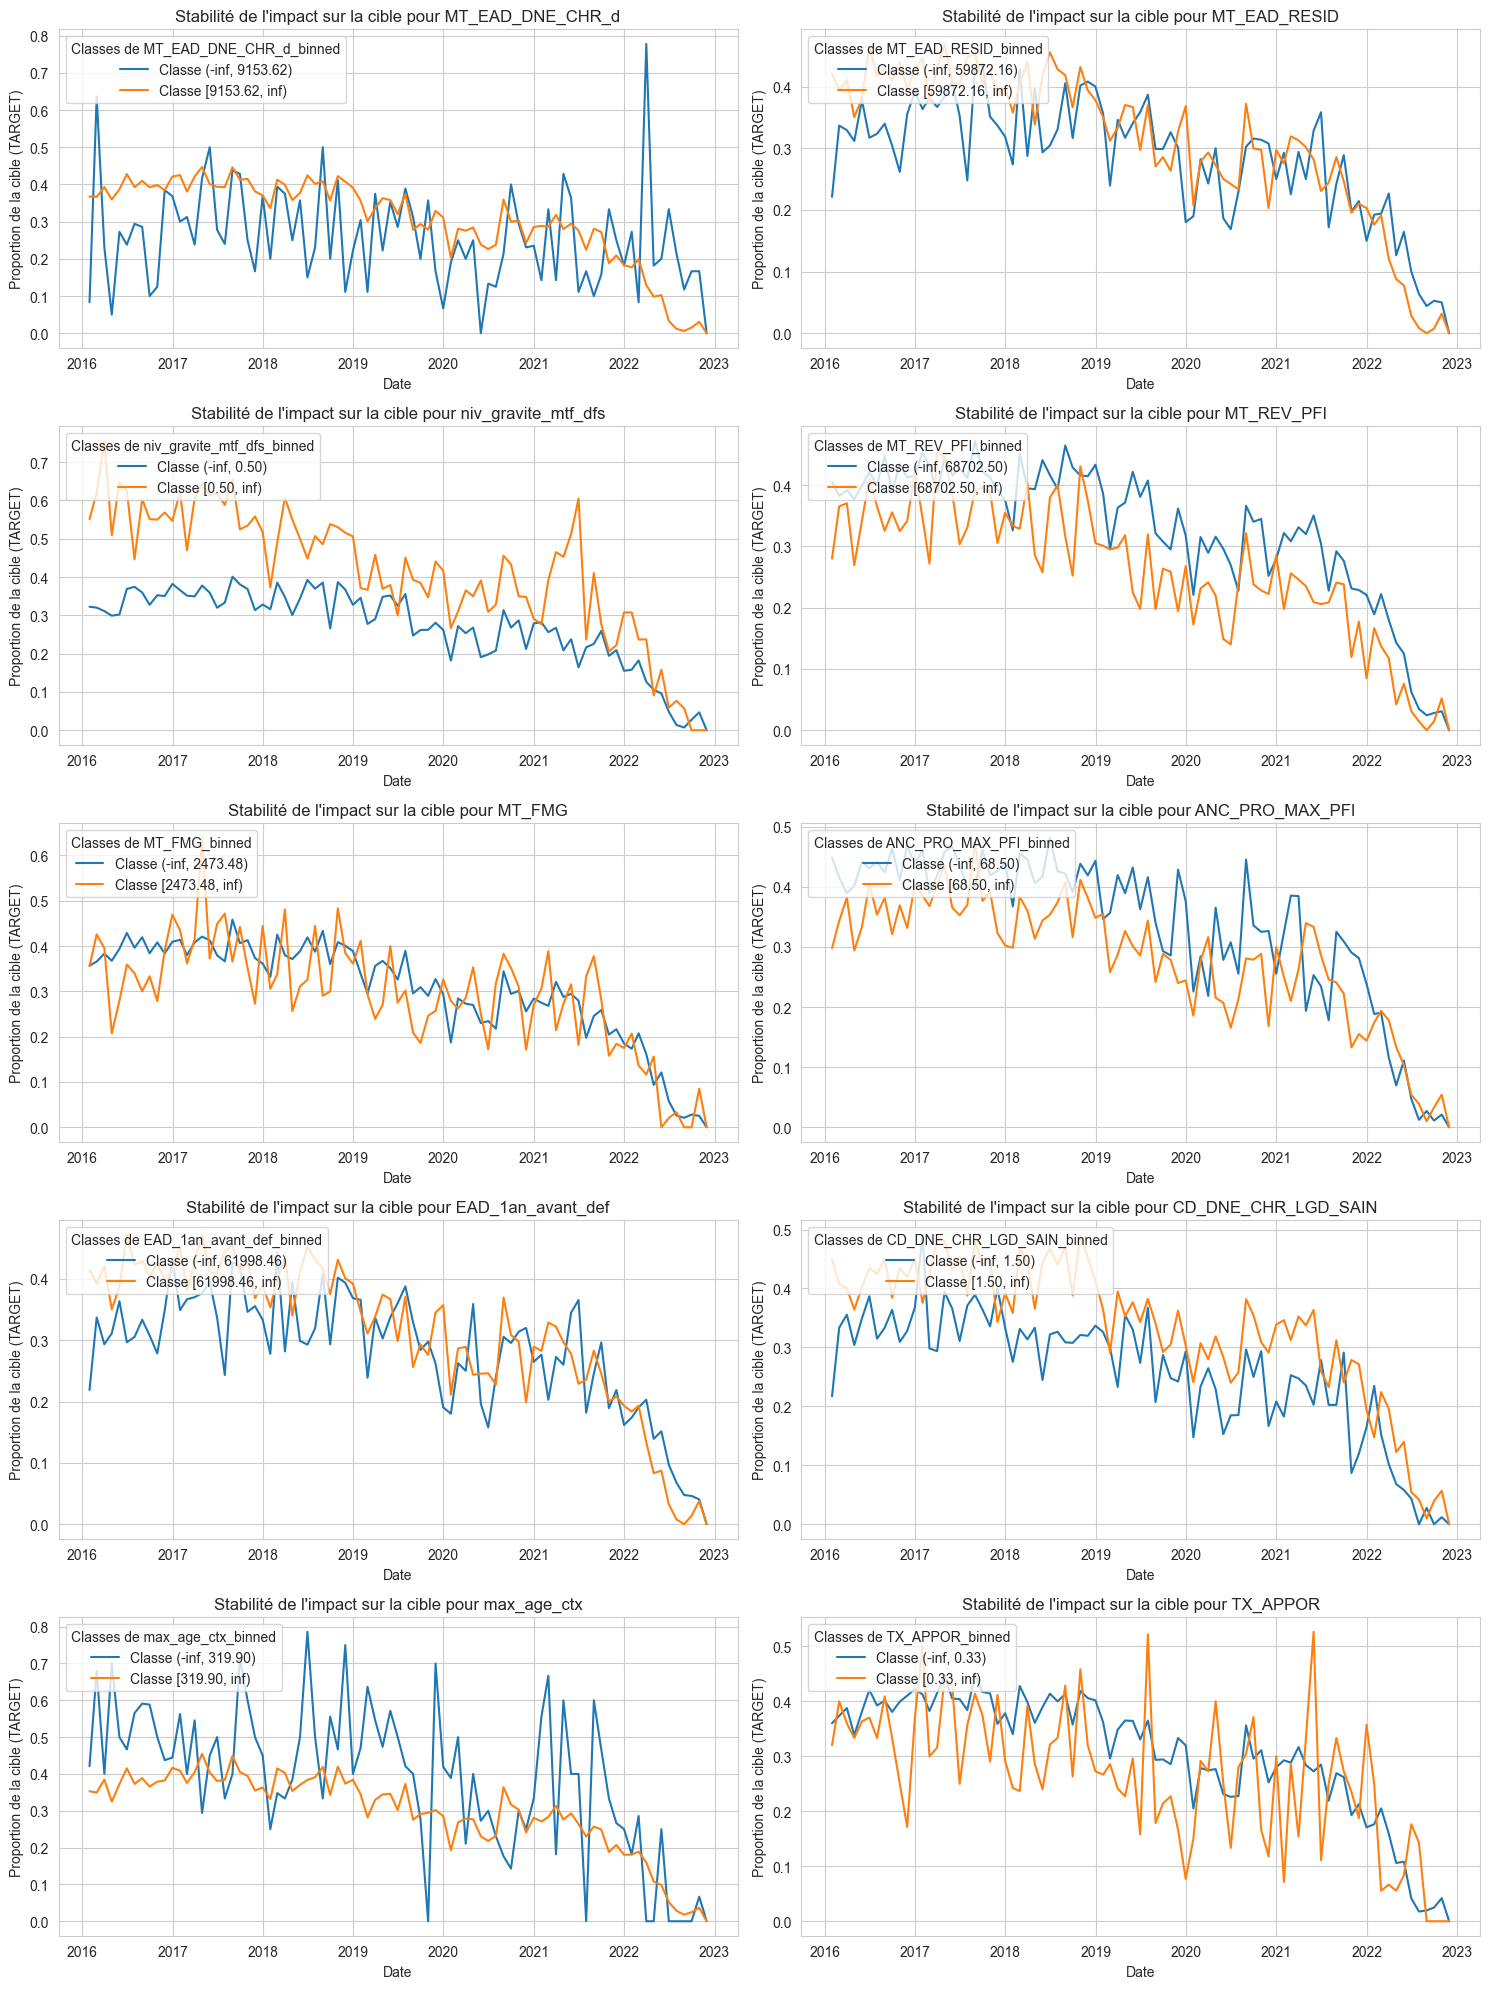

In [442]:
def calculate_stability(column):
    stability_df = df.groupby(['arrete', column])['DET'].mean().unstack()
    stability_df['stability'] = stability_df.std(axis=1) / stability_df.mean(axis=1)
    return stability_df

columns = ['MT_EAD_DNE_CHR_d', 'MT_EAD_RESID', 'niv_gravite_mtf_dfs', 'MT_REV_PFI',
           'MT_FMG', 'ANC_PRO_MAX_PFI', 'EAD_1an_avant_def', 'CD_DNE_CHR_LGD_SAIN',
           'max_age_ctx', 'TX_APPOR']

fig, axs = plt.subplots(nrows=len(columns)//2, ncols=2, figsize=(15, 20))

for i, column in enumerate(columns):
    row = i // 2
    col = i % 2
    ax = axs[row, col]
    
    stability_df = calculate_stability(f"{column}_binned")  # Utilisez la colonne discrétisée
    
    for class_label in stability_df.drop('stability', axis=1).columns:
        values = stability_df[class_label]
        ax.plot(stability_df.index, values, label=f'Classe {class_label}')
    
    ax.set_title(f'Stabilité de l\'impact sur la cible pour {column}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Proportion de la cible (TARGET)')
    ax.legend(title=f'Classes de {column}_binned', loc='upper left')

if len(columns) % 2 != 0:
    axs[-1, -1].axis('off')

plt.tight_layout()
plt.show()

## Encoding des variables catégorielles

### Label encoding pour modalités ayant une relation ordinale

In [443]:
df['Situation_fam'] = df['Situation_fam'].apply(lambda x : 2 if x == 'Mauvaise situation' else 1)

df['Nature'] = df['Nature'].apply(lambda x : 2 if x == 'Mauvaise nature' else 1)

df['Solution_echec'] = df['Solution_echec'].apply(lambda x : 2 if x == 'Mauvaise solution' else 1)

df['Nature_op'] = df['Nature_op'].apply(lambda x : 2 if x == 'Mauvaise nature' else 1)

df['CD_MTF_ENE_CTX'] = df['CD_MTF_ENE_CTX'].apply(lambda x : 2 if x == 'Mauvais MTF' else 1)

df['ETAT_CIVIL'] = df['ETAT_CIVIL'].apply(lambda x : 2 if x == 'Mauvais etat' else 1)

df['CSP'] = df['CSP'].apply(lambda x : 2 if x == 'Mauvaise CSP' else 1)

df['nb_empr_ope'] = df['nb_empr_ope'].apply(lambda x : 1 if x == 'Un emprunteur' else 2)

df['CD_POST_BIEN_PFI'] = df['CD_POST_BIEN_PFI'].apply(lambda x : 3 if x == 'CP tres mauvais' else 2 if x == 'CP mauvais' else 1)

df['CD_MTF_DFC'] = df['CD_MTF_DFC'].apply(lambda x : 3 if x == 'Motif tres mauvais' else 2 if x == 'Motif mauvais' else 1)

df['MT_REV_PFI_binned'] = df['MT_REV_PFI_binned'].apply(lambda x : 1 if x == '(-inf, 68702.50)' else 2)

df['CD_DNE_CHR_LGD_SAIN_binned'] = df['CD_DNE_CHR_LGD_SAIN_binned'].apply(lambda x : 2 if x == '[1.50, inf)' else 1)

df['ANC_PRO_MAX_PFI_binned'] = df['ANC_PRO_MAX_PFI_binned'].apply(lambda x : 2 if x == '[68.50, inf)' else 1)

df['MT_FMG_binned'] = df['MT_FMG_binned'].apply(lambda x : 2 if x == '[2473.48, inf)' else 1)

In [444]:
df_ph['niv_gravite_mtf_dfs'] = df_ph['niv_gravite_mtf_dfs'].apply(lambda x : 1 if x == 'Grave' else 0)
df_ph['niv_gravite_mtf_dfs'] = df_ph['niv_gravite_mtf_dfs'].astype('int')

df_ph['Motif'] = df_ph['Motif'].apply(lambda x : 3 if x == 'Motif tres mauvais' else 2 if x == 'Motif mauvais' else 1)

df_ph['Situation_fam'] = df_ph['Situation_fam'].apply(lambda x : 2 if x == 'Mauvaise situation' else 1)

df_ph['Nature'] = df_ph['Nature'].apply(lambda x : 2 if x == 'Mauvaise nature' else 1)

df_ph['Solution_echec'] = df_ph['Solution_echec'].apply(lambda x : 2 if x == 'Mauvaise solution' else 1)

df_ph['Nature_op'] = df_ph['Nature_op'].apply(lambda x : 2 if x == 'Mauvaise nature' else 1)

df_ph['CD_MTF_ENE_CTX'] = df_ph['MTF'].apply(lambda x : 2 if x == 'Mauvais MTF' else 1)

df_ph['ETAT_CIVIL'] = df_ph['ETAT_CIVIL'].apply(lambda x : 2 if x == 'Mauvais etat' else 1)

df_ph['CSP'] = df_ph['CSP'].apply(lambda x : 2 if x == 'Mauvaise CSP' else 1)

df_ph['MTF'] = df_ph['MTF'].apply(lambda x : 2 if x == 'Mauvais MTF' else 1)

df_ph['nb_empr_ope'] = df_ph['nb_empr_ope'].apply(lambda x : 1 if x == 'Un emprunteur' else 2)

df_ph['CP'] = df_ph['CP'].apply(lambda x : 3 if x == 'CP tres mauvais' else 2 if x == 'CP mauvais' else 1)

# Export des Dataframes

In [445]:
df.to_csv('../data/df_logit_xgb.csv', sep = ',')
df_ph.to_csv('../data/df_duree.csv', sep = ',')